## Find the coincident events between LIGO and Fermi-GBM

In [1]:
# coding: UTF-8
import matplotlib.pyplot as plt
import numpy as np
import sys
from math import pi, cos
from math import log10, floor, factorial
import pandas as pd
from collections import OrderedDict
from matplotlib.ticker import MultipleLocator
from pylab import *


#file_id = sys.argv[1]
sample_number = 35.#float(sys.argv[2])
#file_id_str = str(file_id)
#title = str(sys.argv[3])

# Data table
df1 = pd.read_table('BroHop1Gyrtheta_c10theta_obsGW29_1.txt', sep=' ', names=('z', 'No', 'all', 'onaxis', 'offaxis'))
df2 = pd.read_table('BroHop1Gyrtheta_c10theta_obsGW29_2.txt', sep=' ', names=('z', 'No', 'all', 'onaxis', 'offaxis'))
df3 = pd.read_table('BroHop1Gyrtheta_c10theta_obsGW29_3.txt', sep=' ', names=('z', 'No', 'all', 'onaxis', 'offaxis'))


In [2]:
df1

,z,No,all,onaxis,offaxis
0,0.001000,37787.7,0.000035,0.000002,0.000032
1,0.002154,37787.7,0.000245,0.000024,0.000221
2,0.004642,37787.7,0.001716,0.000240,0.001476
3,0.010000,37787.7,0.011952,0.002394,0.009558
4,0.021544,37787.7,0.082721,0.023808,0.058914
5,0.046416,37787.7,0.566087,0.235111,0.330975
6,0.100000,37787.7,3.781070,2.281020,1.500060
7,0.215443,37787.7,15.439100,11.671400,3.767610
8,0.464159,37787.7,26.754900,20.921900,5.833070
9,1.000000,37787.7,33.402500,26.403100,6.999400


In [3]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#   astromomical parameters and the correction factors     |
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

c = 3.0*10**8   # [m/s]
H_o = 67.89/(3.0857*10**19) # [km/s/Mpc]*[Mpc/km]= [1/s]
Gpc = 3.0857*10**25 # [m/Gpc]
c_H_o = c/H_o/Gpc #[m]/[m/Gpc] = ~4.4[Gpc]
f_R = sample_number/107.
f_FOV = 0.1 # field of veiw
T = 12.6




### re-define the vlaues
##### df['all'], df['onaxis'] and df['offaxis'] are the N(z)/No


In [4]:
# for 1 
df1['all'] = df1['all']/df1['No'] 
df1['onaxis'] = df1['onaxis']/df1['No'] 
df1['offaxis'] = df1['offaxis']/df1['No'] 
df1['LRD'] = df1['No']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 

# for 2 
df2['all'] = df2['all']/df2['No'] 
df2['onaxis'] = df2['onaxis']/df2['No'] 
df2['offaxis'] = df2['offaxis']/df2['No'] 
df2['LRD'] = df2['No']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 

# for 3
df3['all'] = df3['all']/df3['No'] 
df3['onaxis'] = df3['onaxis']/df3['No'] 
df3['offaxis'] = df3['offaxis']/df3['No'] 
df3['LRD'] = df3['No']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 





##### Function gives the coincident events 


In [5]:
def coinc(LRD, f_z,f_FOV_ins,D_ins,D_LIGO,T_LIGO):
    '''
    This exptects 
    df['N80Mpc'] for C-event in O2 with full angles 
    df['N120Mpc'] for C-event in O3 with full angles 
    df['N80MpcOnaxis'] for C-event in O2 with full angles 
    df['N80MpcOnaxis'] for C-event in O3 with full angles, as a input,
    and a field of view of an instrument, a duty cycle of an instrument,
    the duty cycle of LIGO, and the observation time for LIGO in year.
    This compute a coincidence between a instrument and LIGO
    Instrument is as sensitive as Swfit
    '''
    C = LRD*c_H_o**(3)*f_z*D_LIGO*T_LIGO*D_ins*f_FOV_ins
    return C



##### Coincident events for Fermi-GBM 
##### The flux threshold of Fermi-GBM and Fermi-BAT are comparable. The difference is their field of view. 75% is for Fermi-GBM. (10% is for Swift-BAT), D_LIGO = 80% 


In [6]:
df1['cO3all'] = coinc(df1['LRD'], df1['all'], 0.75, 0.8, 0.8, 1.)
df1['cO3on'] = coinc(df1['LRD'], df1['onaxis'], 0.75, 0.8, 0.8, 1.)
df1['cO3off'] = coinc(df1['LRD'], df1['offaxis'], 0.75, 0.8, 0.8, 1.)

df2['cO3all'] = coinc(df2['LRD'], df2['all'], 0.75, 0.8, 0.8, 1.)
df2['cO3on'] = coinc(df2['LRD'], df2['onaxis'], 0.75, 0.8, 0.8, 1.)
df2['cO3off'] = coinc(df2['LRD'], df2['offaxis'], 0.75, 0.8, 0.8, 1.)

df3['cO3all'] = coinc(df3['LRD'], df3['all'], 0.75, 0.8, 0.8, 1.)
df3['cO3on'] = coinc(df3['LRD'], df3['onaxis'], 0.75, 0.8, 0.8, 1.)
df3['cO3off'] = coinc(df3['LRD'], df3['offaxis'], 0.75, 0.8, 0.8, 1.)

df1

,z,No,all,onaxis,offaxis,LRD,cO3all,cO3on,cO3off
0,0.001000,37787.7,9.228320e-10,6.360694e-11,8.592240e-10,1328.187296,0.000051,0.000003,0.000047
1,0.002154,37787.7,6.489387e-09,6.357413e-10,5.853651e-09,1328.187296,0.000357,0.000035,0.000322
2,0.004642,37787.7,4.541240e-08,6.350320e-09,3.906192e-08,1328.187296,0.002498,0.000349,0.002149
3,0.010000,37787.7,3.162934e-07,6.334786e-08,2.529461e-07,1328.187296,0.017400,0.003485,0.013915
4,0.021544,37787.7,2.189107e-06,6.300357e-07,1.559071e-06,1328.187296,0.120424,0.034659,0.085766
5,0.046416,37787.7,1.498072e-05,6.221892e-06,8.758802e-06,1328.187296,0.824099,0.342270,0.481828
6,0.100000,37787.7,1.000609e-04,6.036409e-05,3.969704e-05,1328.187296,5.504415,3.320669,2.183761
7,0.215443,37787.7,4.085747e-04,3.088677e-04,9.970467e-05,1328.187296,22.475969,16.991018,5.484820
8,0.464159,37787.7,7.080320e-04,5.536696e-04,1.543643e-04,1328.187296,38.949310,30.457732,8.491680
9,1.000000,37787.7,8.839517e-04,6.987221e-04,1.852296e-04,1328.187296,48.626769,38.437166,10.189603


### Average out the uncertainty of the LF


In [7]:
# the store the matrix averaged out of the uncertainty of the LF 
# but what I want to get are only z, cO3all, cO3all, cO3on and cO3off 

cO3all_ave = []
cO3on_ave = []
cO3off_ave = []

for i in np.arange(0,10, 1):
    cO3all_ave.append((df1['cO3all'].loc[i]+df2['cO3all'].loc[i]+df3['cO3all'].loc[i])/3.)
    cO3on_ave.append((df1['cO3on'].loc[i]+df2['cO3on'].loc[i]+df3['cO3on'].loc[i])/3.)
    cO3off_ave.append((df1['cO3off'].loc[i]+df2['cO3off'].loc[i]+df3['cO3off'].loc[i])/3.)


mat_ave = np.transpose(np.array([df1['z'], cO3all_ave, cO3on_ave, cO3off_ave]))
df_ave = pd.DataFrame(mat_ave, columns=('z', 'cO3all', 'cO3on', 'cO3off'))
df_ave

,z,cO3all,cO3on,cO3off
0,0.001000,0.000084,0.000007,0.000077
1,0.002154,0.000587,0.000068,0.000519
2,0.004642,0.004104,0.000679,0.003425
3,0.010000,0.028557,0.006774,0.021783
4,0.021544,0.197525,0.067376,0.130150
5,0.046416,1.351136,0.665365,0.685771
6,0.100000,8.369860,5.765276,2.604589
7,0.215443,24.031084,18.416908,5.614161
8,0.464159,39.344749,30.883500,8.461230
9,1.000000,48.746434,38.643741,10.102668


/Users/kentaromogushi/virtenv/python2-dir/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


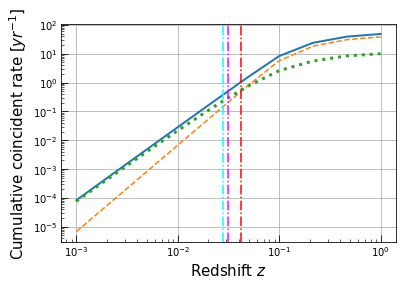

In [8]:
#7.5 comes from Fermi field of view
plt.loglog(df_ave['z'], df_ave['cO3all'], label='Sum of on- and off-axis', linewidth=2)
plt.loglog(df_ave['z'], df_ave['cO3on'], '--',label='On-axis only')
plt.loglog(df_ave['z'], df_ave['cO3off'], ':', lw=3 ,label='Off-axis only')
# plot vertical lines indecating the NSNS ranges 
#plt.scatter([0.027]*100, np.logspace(-6, 3, 100), c='r', marker='s', s=0.1 )
#plt.axvline(x=0.027, c='r') # LH in O3, 120 Mpc
#plt.axvline(x=0.0145, c='cyan') # V in O3, 65 Mpc
plt.axvline(x=0.0417, c='r', ls='-.') # LH in O4+ and design, 190Mpc
plt.axvline(x=0.0277, c='cyan', ls='-.') # V in design, 125 Mpc
plt.axvline(x=0.03095, c='magenta', ls='-.') # K in design, 140 Mpc
plt.grid()
#plt.legend()
#plt.title('Coincident events between LIGO and Swift', fontsize=15)

plt.xlabel(r'Redshift $z$', fontsize=15)
plt.ylabel(r'Cumulative coincident rate [$yr^{-1}$]', fontsize=15)
plt.axes().yaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().yaxis.set_tick_params(which='minor', right = False, length=3)
plt.axes().xaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().xaxis.set_tick_params(which='minor', right = False, length=3)
plt.tick_params(which='both', direction='in')
plt.savefig('CO3Fermi.pdf')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# plot the cumulative number as a function of z with error 


In [9]:
# Data table
# the theta_c = 10.7 deg (median)
df1med = pd.read_table('/Users/kentaromogushi/Documents/department/research/shortgamma/chi/Obtain_chi/Allobtain/swiftdata/plusjet/typi/onaxis/BroHop1Gyrtheta_c10p7theta_obsGW29_1.txt', sep=' ', names=('z', 'No', 'all', 'onaxis', 'offaxis'))
df2med = pd.read_table('/Users/kentaromogushi/Documents/department/research/shortgamma/chi/Obtain_chi/Allobtain/swiftdata/plusjet/typi/onaxis/BroHop1Gyrtheta_c10p7theta_obsGW29_2.txt', sep=' ', names=('z', 'No', 'all', 'onaxis', 'offaxis'))
df3med = pd.read_table('/Users/kentaromogushi/Documents/department/research/shortgamma/chi/Obtain_chi/Allobtain/swiftdata/plusjet/typi/onaxis/BroHop1Gyrtheta_c10p7theta_obsGW29_3.txt', sep=' ', names=('z', 'No', 'all', 'onaxis', 'offaxis'))
# the theta_c = 7.4 deg (lower bound)
df1lb = pd.read_table('/Users/kentaromogushi/Documents/department/research/shortgamma/chi/Obtain_chi/Allobtain/swiftdata/plusjet/typi/onaxis/BroHop1Gyrtheta_c7p4theta_obsGW29_1.txt', sep=' ', names=('z', 'No', 'all', 'onaxis', 'offaxis'))
df2lb = pd.read_table('/Users/kentaromogushi/Documents/department/research/shortgamma/chi/Obtain_chi/Allobtain/swiftdata/plusjet/typi/onaxis/BroHop1Gyrtheta_c7p4theta_obsGW29_2.txt', sep=' ', names=('z', 'No', 'all', 'onaxis', 'offaxis'))
df3lb = pd.read_table('/Users/kentaromogushi/Documents/department/research/shortgamma/chi/Obtain_chi/Allobtain/swiftdata/plusjet/typi/onaxis/BroHop1Gyrtheta_c7p4theta_obsGW29_3.txt', sep=' ', names=('z', 'No', 'all', 'onaxis', 'offaxis'))
# the theta_c = 16.8 deg (uppper bound)
df1ub = pd.read_table('/Users/kentaromogushi/Documents/department/research/shortgamma/chi/Obtain_chi/Allobtain/swiftdata/plusjet/typi/onaxis/BroHop1Gyrtheta_c16p8theta_obsGW29_1.txt', sep=' ', names=('z', 'No', 'all', 'onaxis', 'offaxis'))
df2ub = pd.read_table('/Users/kentaromogushi/Documents/department/research/shortgamma/chi/Obtain_chi/Allobtain/swiftdata/plusjet/typi/onaxis/BroHop1Gyrtheta_c16p8theta_obsGW29_2.txt', sep=' ', names=('z', 'No', 'all', 'onaxis', 'offaxis'))
df3ub = pd.read_table('/Users/kentaromogushi/Documents/department/research/shortgamma/chi/Obtain_chi/Allobtain/swiftdata/plusjet/typi/onaxis/BroHop1Gyrtheta_c16p8theta_obsGW29_3.txt', sep=' ', names=('z', 'No', 'all', 'onaxis', 'offaxis'))







In [10]:
df1med

,z,No,all,onaxis,offaxis
0,0.001000,33561.2,0.000030,0.000002,0.000027
1,0.002154,33561.2,0.000214,0.000024,0.000190
2,0.004642,33561.2,0.001535,0.000244,0.001291
3,0.010000,33561.2,0.010938,0.002433,0.008504
4,0.021544,33561.2,0.077474,0.024200,0.053273
5,0.046416,33561.2,0.542749,0.238991,0.303759
6,0.100000,33561.2,3.712610,2.318650,1.393960
7,0.215443,33561.2,15.384800,11.864000,3.520830
8,0.464159,33561.2,26.726300,21.267100,5.459240
9,1.000000,33561.2,33.394000,26.838700,6.555290


### re-define the vlaues
##### df['all'], df['onaxis'] and df['offaxis'] are the N(z)/No



In [11]:
# for 1, median 
df1med['all'] = df1med['all']/df1med['No'] 
df1med['onaxis'] = df1med['onaxis']/df1med['No'] 
df1med['offaxis'] = df1med['offaxis']/df1med['No'] 
df1med['LRD'] = df1med['No']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 

# for 2, median 
df2med['all'] = df2med['all']/df2med['No'] 
df2med['onaxis'] = df2med['onaxis']/df2med['No'] 
df2med['offaxis'] = df2med['offaxis']/df2med['No'] 
df2med['LRD'] = df2med['No']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 

# for 3, median 
df3med['all'] = df3med['all']/df3med['No'] 
df3med['onaxis'] = df3med['onaxis']/df3med['No'] 
df3med['offaxis'] = df3med['offaxis']/df3med['No'] 
df3med['LRD'] = df3med['No']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 

# for 1, lower bound  
df1lb['all'] = df1lb['all']/df1lb['No'] 
df1lb['onaxis'] = df1lb['onaxis']/df1lb['No'] 
df1lb['offaxis'] = df1lb['offaxis']/df1lb['No'] 
df1lb['LRD'] = df1lb['No']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 

# for 2, lower bound  
df2lb['all'] = df2lb['all']/df2lb['No'] 
df2lb['onaxis'] = df2lb['onaxis']/df2lb['No'] 
df2lb['offaxis'] = df2lb['offaxis']/df2lb['No'] 
df2lb['LRD'] = df2lb['No']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 

# for 3, lower bound  
df3lb['all'] = df3lb['all']/df3lb['No'] 
df3lb['onaxis'] = df3lb['onaxis']/df3lb['No'] 
df3lb['offaxis'] = df3lb['offaxis']/df3lb['No'] 
df3lb['LRD'] = df3lb['No']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 

# for 1, uppper bound  
df1ub['all'] = df1ub['all']/df1ub['No'] 
df1ub['onaxis'] = df1ub['onaxis']/df1ub['No'] 
df1ub['offaxis'] = df1ub['offaxis']/df1ub['No'] 
df1ub['LRD'] = df1ub['No']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 

# for 2, upper  bound  
df2ub['all'] = df2ub['all']/df2ub['No'] 
df2ub['onaxis'] = df2ub['onaxis']/df2ub['No'] 
df2ub['offaxis'] = df2ub['offaxis']/df2ub['No'] 
df2ub['LRD'] = df2ub['No']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 

# for 3, upper  bound  
df3ub['all'] = df3ub['all']/df3ub['No'] 
df3ub['onaxis'] = df3ub['onaxis']/df3ub['No'] 
df3ub['offaxis'] = df3ub['offaxis']/df3ub['No'] 
df3ub['LRD'] = df3ub['No']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 




##### Coincident events for Fermi-GBM 
##### The flux threshold of Fermi-GBM and Fermi-BAT are comparable. The difference is their field of view. 75% is for Fermi-GBM. (10% is for Swift-BAT), D_LIGO = 80% 



In [12]:
# for theta_c = 10.7 deg (median )
df1med['cO3all'] = coinc(df1med['LRD'], df1med['all'], 0.75, 0.8, 0.8, 1.)
df1med['cO3on'] = coinc(df1med['LRD'], df1med['onaxis'], 0.75, 0.8, 0.8, 1.)
df1med['cO3off'] = coinc(df1med['LRD'], df1med['offaxis'], 0.75, 0.8, 0.8, 1.)

df2med['cO3all'] = coinc(df2med['LRD'], df2med['all'], 0.75, 0.8, 0.8, 1.)
df2med['cO3on'] = coinc(df2med['LRD'], df2med['onaxis'], 0.75, 0.8, 0.8, 1.)
df2med['cO3off'] = coinc(df2med['LRD'], df2med['offaxis'], 0.75, 0.8, 0.8, 1.)

df3med['cO3all'] = coinc(df3med['LRD'], df3med['all'], 0.75, 0.8, 0.8, 1.)
df3med['cO3on'] = coinc(df3med['LRD'], df3med['onaxis'], 0.75, 0.8, 0.8, 1.)
df3med['cO3off'] = coinc(df3med['LRD'], df3med['offaxis'], 0.75, 0.8, 0.8, 1.)

# for theta_c = 7.4 deg (lower bound)
df1lb['cO3all'] = coinc(df1lb['LRD'], df1lb['all'], 0.75, 0.8, 0.8, 1.)
df1lb['cO3on'] = coinc(df1lb['LRD'], df1lb['onaxis'], 0.75, 0.8, 0.8, 1.)
df1lb['cO3off'] = coinc(df1lb['LRD'], df1lb['offaxis'], 0.75, 0.8, 0.8, 1.)

df2lb['cO3all'] = coinc(df2lb['LRD'], df2lb['all'], 0.75, 0.8, 0.8, 1.)
df2lb['cO3on'] = coinc(df2lb['LRD'], df2lb['onaxis'], 0.75, 0.8, 0.8, 1.)
df2lb['cO3off'] = coinc(df2lb['LRD'], df2lb['offaxis'], 0.75, 0.8, 0.8, 1.)

df3lb['cO3all'] = coinc(df3lb['LRD'], df3lb['all'], 0.75, 0.8, 0.8, 1.)
df3lb['cO3on'] = coinc(df3lb['LRD'], df3lb['onaxis'], 0.75, 0.8, 0.8, 1.)
df3lb['cO3off'] = coinc(df3lb['LRD'], df3lb['offaxis'], 0.75, 0.8, 0.8, 1.)

# for theta_c = 16.8 deg (uppper bound)
df1ub['cO3all'] = coinc(df1ub['LRD'], df1ub['all'], 0.75, 0.8, 0.8, 1.)
df1ub['cO3on'] = coinc(df1ub['LRD'], df1ub['onaxis'], 0.75, 0.8, 0.8, 1.)
df1ub['cO3off'] = coinc(df1ub['LRD'], df1ub['offaxis'], 0.75, 0.8, 0.8, 1.)

df2ub['cO3all'] = coinc(df2ub['LRD'], df2ub['all'], 0.75, 0.8, 0.8, 1.)
df2ub['cO3on'] = coinc(df2ub['LRD'], df2ub['onaxis'], 0.75, 0.8, 0.8, 1.)
df2ub['cO3off'] = coinc(df2ub['LRD'], df2ub['offaxis'], 0.75, 0.8, 0.8, 1.)

df3ub['cO3all'] = coinc(df3ub['LRD'], df3ub['all'], 0.75, 0.8, 0.8, 1.)
df3ub['cO3on'] = coinc(df3ub['LRD'], df3ub['onaxis'], 0.75, 0.8, 0.8, 1.)
df3ub['cO3off'] = coinc(df3ub['LRD'], df3ub['offaxis'], 0.75, 0.8, 0.8, 1.)



In [13]:
df2med


,z,No,all,onaxis,offaxis,LRD,cO3all,cO3on,cO3off
0,0.001000,99387.7,7.040821e-10,7.279885e-11,6.312833e-10,3493.345202,0.000102,0.000011,0.000091
1,0.002154,99387.7,5.048260e-09,7.276142e-10,4.320645e-09,3493.345202,0.000730,0.000105,0.000625
2,0.004642,99387.7,3.606825e-08,7.268012e-09,2.880014e-08,3493.345202,0.005219,0.001052,0.004167
3,0.010000,99387.7,2.567088e-07,7.250253e-08,1.842069e-07,3493.345202,0.037142,0.010490,0.026652
4,0.021544,99387.7,1.816744e-06,7.210842e-07,1.095659e-06,3493.345202,0.262859,0.104331,0.158527
5,0.046416,99387.7,1.271948e-05,7.121042e-06,5.598479e-06,3493.345202,1.840342,1.030321,0.810026
6,0.100000,99387.7,7.356313e-05,5.493507e-05,1.862806e-05,3493.345202,10.643618,7.948382,2.695235
7,0.215443,99387.7,1.708572e-04,1.344271e-04,3.642986e-05,3493.345202,24.720785,19.449834,5.270922
8,0.464159,99387.7,2.713243e-04,2.169132e-04,5.441046e-05,3493.345202,39.257063,31.384483,7.872478
9,1.000000,99387.7,3.371443e-04,2.720216e-04,6.512285e-05,3493.345202,48.780354,39.357948,9.422420


### Average out the uncertainty of the LF

In [14]:
# for the average at theta_c = median 
cO3all_ave_med = []
cO3on_ave_med = []
cO3off_ave_med = []
# standard deviation at theta_c = median 
cO3all_sd_med = []
cO3on_sd_med = []
cO3off_sd_med = []
# for the average at theta_c = lower bound
cO3all_ave_lb = []
cO3on_ave_lb = []
cO3off_ave_lb = []
# standard deviation at theta_c = lower bound
cO3all_sd_lb = []
cO3on_sd_lb = []
cO3off_sd_lb = []
# for the average at theta_c = uppper bound 
cO3all_ave_ub = []
cO3on_ave_ub = []
cO3off_ave_ub = []
# standard deviation at theta_c = uppper bound
cO3all_sd_ub = []
cO3on_sd_ub = []
cO3off_sd_ub = []

for i in np.arange(0,10, 1): # looping through a given redshift z 
    # for theta_c = median
    #### calculate the average 
    cO3all_ave_med.append((df1med['cO3all'].loc[i]+df2med['cO3all'].loc[i]+df3med['cO3all'].loc[i])/3.)
    cO3on_ave_med.append((df1med['cO3on'].loc[i]+df2med['cO3on'].loc[i]+df3med['cO3on'].loc[i])/3.)
    cO3off_ave_med.append((df1med['cO3off'].loc[i]+df2med['cO3off'].loc[i]+df3med['cO3off'].loc[i])/3.)
    #### calculate the standard deviation 
    cO3all_sd_med.append(np.std([df1med['cO3all'].loc[i],df2med['cO3all'].loc[i],df3med['cO3all'].loc[i]], ddof=1))
    cO3on_sd_med.append(np.std([df1med['cO3on'].loc[i],df2med['cO3on'].loc[i],df3med['cO3on'].loc[i]], ddof=1))
    cO3off_sd_med.append(np.std([df1med['cO3off'].loc[i],df2med['cO3off'].loc[i],df3med['cO3off'].loc[i]], ddof=1))
    # for theta_c = the lower bound  
    #### calculate the average 
    cO3all_ave_lb.append((df1lb['cO3all'].loc[i]+df2lb['cO3all'].loc[i]+df3lb['cO3all'].loc[i])/3.)
    cO3on_ave_lb.append((df1lb['cO3on'].loc[i]+df2lb['cO3on'].loc[i]+df3lb['cO3on'].loc[i])/3.)
    cO3off_ave_lb.append((df1lb['cO3off'].loc[i]+df2lb['cO3off'].loc[i]+df3lb['cO3off'].loc[i])/3.)
    #### calculate the standard deviation
    cO3all_sd_lb.append(np.std([df1lb['cO3all'].loc[i],df2lb['cO3all'].loc[i],df3lb['cO3all'].loc[i]], ddof=1))
    cO3on_sd_lb.append(np.std([df1lb['cO3on'].loc[i],df2lb['cO3on'].loc[i],df3lb['cO3on'].loc[i]], ddof=1))
    cO3off_sd_lb.append(np.std([df1lb['cO3off'].loc[i],df2lb['cO3off'].loc[i],df3lb['cO3off'].loc[i]], ddof=1))
    # for theta_c = the upper bound  
    ####  calculate the average 
    cO3all_ave_ub.append((df1ub['cO3all'].loc[i]+df2ub['cO3all'].loc[i]+df3ub['cO3all'].loc[i])/3.)
    cO3on_ave_ub.append((df1ub['cO3on'].loc[i]+df2ub['cO3on'].loc[i]+df3ub['cO3on'].loc[i])/3.)
    cO3off_ave_ub.append((df1ub['cO3off'].loc[i]+df2ub['cO3off'].loc[i]+df3ub['cO3off'].loc[i])/3.)
    #### calculate the standard deviation 
    cO3all_sd_ub.append(np.std([df1ub['cO3all'].loc[i],df2ub['cO3all'].loc[i],df3ub['cO3all'].loc[i]], ddof=1))
    cO3on_sd_ub.append(np.std([df1ub['cO3on'].loc[i],df2ub['cO3on'].loc[i],df3ub['cO3on'].loc[i]], ddof=1))
    cO3off_sd_ub.append(np.std([df1ub['cO3off'].loc[i],df2ub['cO3off'].loc[i],df3ub['cO3off'].loc[i]], ddof=1))

# for theta_c = median 
#### average 
mat_ave_med = np.transpose(np.array([df1med['z'], cO3all_ave_med, cO3on_ave_med, cO3off_ave_med]))
df_ave_med = pd.DataFrame(mat_ave_med, columns=('z', 'cO3all', 'cO3on', 'cO3off'))
#### standard deviation 
mat_sd_med = np.transpose(np.array([df1med['z'], cO3all_sd_med, cO3on_sd_med, cO3off_sd_med]))
df_sd_med = pd.DataFrame(mat_sd_med, columns=('z', 'cO3all', 'cO3on', 'cO3off'))

# for theta_c = lower bound 
#### average 
mat_ave_lb = np.transpose(np.array([df1lb['z'], cO3all_ave_lb, cO3on_ave_lb, cO3off_ave_lb]))
df_ave_lb = pd.DataFrame(mat_ave_lb, columns=('z', 'cO3all', 'cO3on', 'cO3off'))
#### standard deviation
mat_sd_lb = np.transpose(np.array([df1lb['z'], cO3all_sd_lb, cO3on_sd_lb, cO3off_sd_lb]))
df_sd_lb = pd.DataFrame(mat_sd_lb, columns=('z', 'cO3all', 'cO3on', 'cO3off'))

# for theta_c = upper bound  
##### average 
mat_ave_ub = np.transpose(np.array([df1ub['z'], cO3all_ave_ub, cO3on_ave_ub, cO3off_ave_ub]))
df_ave_ub = pd.DataFrame(mat_ave_ub, columns=('z', 'cO3all', 'cO3on', 'cO3off'))
#### standard deviation
mat_sd_ub = np.transpose(np.array([df1ub['z'], cO3all_sd_ub, cO3on_sd_ub, cO3off_sd_ub]))
df_sd_ub = pd.DataFrame(mat_sd_ub, columns=('z', 'cO3all', 'cO3on', 'cO3off'))

### check them individually

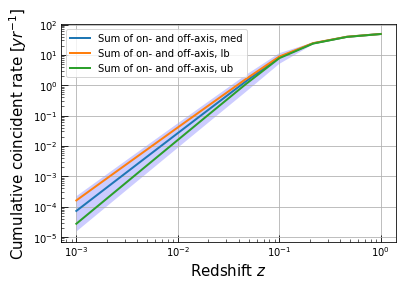

The lowest value is given by UPPER BOUND (WIDER theta_c)
The biggest value is given by LOWER BOUND (NARROWER theta_c)
Make sense. Becuase the narower theta_c leads to slow decay (more off-axis events)


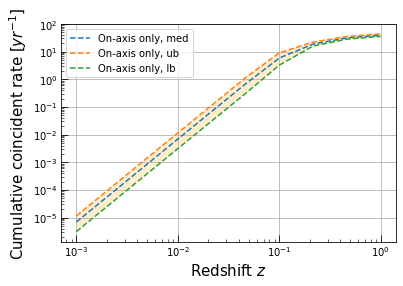

The lowest value is given by LOWER BOUND (NARROWER theta_c)
The biggest value is given by UPPER BOUND (WIDER theta_c)
Make sense. Becuase wider theta_c gives more on-axis events


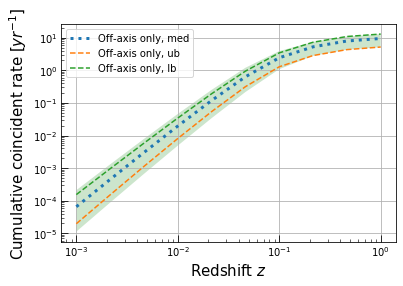

The lowest value is given by UPPER BOUND (WIDER theta_c)
The biggest value is given by LOWER BOUND (NARROWER theta_c)
Make sense. Becuase narrower theta_c gives more off-axis events


In [15]:
# the sum of on- and off- events 
plt.plot(df_ave_med['z'], df_ave_med['cO3all'], label='Sum of on- and off-axis, med', linewidth=2)
#===================================
plt.plot(df_ave_lb['z'], df_ave_lb['cO3all'], label='Sum of on- and off-axis, lb', linewidth=2)
plt.plot(df_ave_ub['z'], df_ave_ub['cO3all'], label='Sum of on- and off-axis, ub', linewidth=2)
#===================================
plt.fill_between(df_ave_med['z'], df_ave_ub['cO3all']-df_sd_ub['cO3all'], df_ave_lb['cO3all']+df_sd_lb['cO3all'], facecolor='blue', edgecolor='none',alpha=0.2)
plt.grid()
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'Redshift $z$', fontsize=15)
plt.ylabel(r'Cumulative coincident rate [$yr^{-1}$]', fontsize=15)
plt.axes().yaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().yaxis.set_tick_params(which='minor', right = False, length=3)
plt.axes().xaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().xaxis.set_tick_params(which='minor', right = False, length=3)
plt.tick_params(which='both', direction='in')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
print('The lowest value is given by UPPER BOUND (WIDER theta_c)')
print('The biggest value is given by LOWER BOUND (NARROWER theta_c)')
print('Make sense. Becuase the narower theta_c leads to slow decay (more off-axis events)')

#==================================================

# on-axis events 
plt.loglog(df_ave_med['z'], df_ave_med['cO3on'], '--',label='On-axis only, med')
#plt.fill_between(df_ave_med['z'], df_ave_ub['cO3on']-df_sd_ub['cO3on'], df_ave_lb['cO3on']+df_sd_lb['cO3on'], facecolor='orange', edgecolor='none',alpha=0.2)
plt.fill_between(df_ave_med['z'], df_ave_lb['cO3on']-df_sd_lb['cO3on'], df_ave_ub['cO3on']+df_sd_ub['cO3on'], facecolor='orange', edgecolor='none',alpha=0.2)
#====================
plt.loglog(df_ave_ub['z'], df_ave_ub['cO3on']+df_sd_ub['cO3on'], '--',label='On-axis only, ub')
plt.loglog(df_ave_lb['z'], df_ave_lb['cO3on']-df_sd_lb['cO3on'], '--',label='On-axis only, lb')
#====================
plt.grid()
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'Redshift $z$', fontsize=15)
plt.ylabel(r'Cumulative coincident rate [$yr^{-1}$]', fontsize=15)
plt.axes().yaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().yaxis.set_tick_params(which='minor', right = False, length=3)
plt.axes().xaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().xaxis.set_tick_params(which='minor', right = False, length=3)
plt.tick_params(which='both', direction='in')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
print('The lowest value is given by LOWER BOUND (NARROWER theta_c)')
print('The biggest value is given by UPPER BOUND (WIDER theta_c)')
print('Make sense. Becuase wider theta_c gives more on-axis events')

#====================================

# off-axis events 
plt.loglog(df_ave_med['z'], df_ave_med['cO3off'], ':', lw=3 ,label='Off-axis only, med')
plt.fill_between(df_ave_med['z'], df_ave_ub['cO3off']-df_sd_ub['cO3off'], df_ave_lb['cO3off']+df_sd_lb['cO3off'], facecolor='green', edgecolor='none',alpha=0.2)
#====================
plt.loglog(df_ave_ub['z'], df_ave_ub['cO3off'], '--',label='Off-axis only, ub')
plt.loglog(df_ave_lb['z'], df_ave_lb['cO3off'], '--',label='Off-axis only, lb')
#====================
plt.grid()
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'Redshift $z$', fontsize=15)
plt.ylabel(r'Cumulative coincident rate [$yr^{-1}$]', fontsize=15)
plt.axes().yaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().yaxis.set_tick_params(which='minor', right = False, length=3)
plt.axes().xaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().xaxis.set_tick_params(which='minor', right = False, length=3)
plt.tick_params(which='both', direction='in')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
print('The lowest value is given by UPPER BOUND (WIDER theta_c)')
print('The biggest value is given by LOWER BOUND (NARROWER theta_c)')
print('Make sense. Becuase narrower theta_c gives more off-axis events')





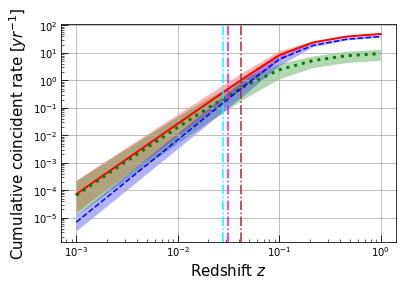

In [16]:
# the sum of on- and off- events 
plt.plot(df_ave_med['z'], df_ave_med['cO3all'], c='red',label='Sum of on- and off-axis', linewidth=2)
# the lower bound is given by theta_c = upper bonnd - its standard deviation 
# the upper buund is given by theta_c = lower bound + its standard deviation 
plt.fill_between(df_ave_med['z'], df_ave_ub['cO3all']-df_sd_ub['cO3all'], df_ave_lb['cO3all']+df_sd_lb['cO3all'], facecolor='red', edgecolor='none',alpha=0.3)


# off-axis events 
plt.loglog(df_ave_med['z'], df_ave_med['cO3off'], c='green' ,ls=':', lw=3 ,label='Off-axis only')
plt.fill_between(df_ave_med['z'], df_ave_ub['cO3off']-df_sd_ub['cO3off'], df_ave_lb['cO3off']+df_sd_lb['cO3off'], facecolor='green', edgecolor='none',alpha=0.3)

# on-axis events 
plt.loglog(df_ave_med['z'], df_ave_med['cO3on'], c='blue', ls='--',label='On-axis only')
plt.fill_between(df_ave_med['z'], df_ave_lb['cO3on']-df_sd_lb['cO3on'], df_ave_ub['cO3on']+df_sd_ub['cO3on'], facecolor='blue', edgecolor='none',alpha=0.3)



# plot vertical lines indecating the NSNS ranges 
#plt.scatter([0.027]*100, np.logspace(-6, 3, 100), c='r', marker='s', s=0.1 )
#plt.axvline(x=0.027, c='r') # LH in O3, 120 Mpc
#plt.axvline(x=0.0145, c='cyan') # V in O3, 65 Mpc

plt.axvline(x=0.0417, c='brown', ls='-.') # LH in O4+ and design, 190Mpc
plt.axvline(x=0.0277, c='cyan', ls='-.') # V in design, 125 Mpc
plt.axvline(x=0.03095, c='magenta', ls='-.') # K in design, 140 Mpc
plt.grid()
#plt.legend()
plt.yscale('log')
plt.xscale('log')
#plt.title('Coincident events between LIGO and Swift', fontsize=15)

plt.xlabel(r'Redshift $z$', fontsize=15)
plt.ylabel(r'Cumulative coincident rate [$yr^{-1}$]', fontsize=15)
plt.axes().yaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().yaxis.set_tick_params(which='minor', right = False, length=3)
plt.axes().xaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().xaxis.set_tick_params(which='minor', right = False, length=3)
plt.tick_params(which='both', direction='in')
plt.savefig('CO3Fermi.pdf')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

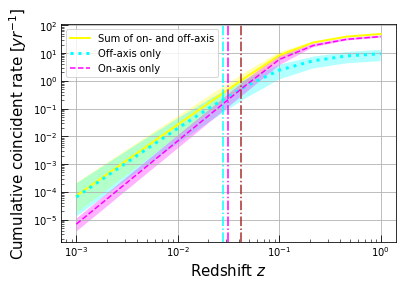

In [82]:
# the sum of on- and off- events 
plt.plot(df_ave_med['z'], df_ave_med['cO3all'], c='yellow',label='Sum of on- and off-axis', linewidth=2)
# the lower bound is given by theta_c = upper bonnd - its standard deviation 
# the upper buund is given by theta_c = lower bound + its standard deviation 
plt.fill_between(df_ave_med['z'], df_ave_ub['cO3all']-df_sd_ub['cO3all'], df_ave_lb['cO3all']+df_sd_lb['cO3all'], facecolor='yellow', edgecolor='none',alpha=0.3)


# off-axis events 
plt.loglog(df_ave_med['z'], df_ave_med['cO3off'], c='cyan' ,ls=':', lw=3 ,label='Off-axis only')
plt.fill_between(df_ave_med['z'], df_ave_ub['cO3off']-df_sd_ub['cO3off'], df_ave_lb['cO3off']+df_sd_lb['cO3off'], facecolor='cyan', edgecolor='none',alpha=0.3)

# on-axis events 
plt.loglog(df_ave_med['z'], df_ave_med['cO3on'], c='magenta', ls='--',label='On-axis only')
plt.fill_between(df_ave_med['z'], df_ave_lb['cO3on']-df_sd_lb['cO3on'], df_ave_ub['cO3on']+df_sd_ub['cO3on'], facecolor='magenta', edgecolor='none',alpha=0.3)



# plot vertical lines indecating the NSNS ranges 
#plt.scatter([0.027]*100, np.logspace(-6, 3, 100), c='r', marker='s', s=0.1 )
#plt.axvline(x=0.027, c='r') # LH in O3, 120 Mpc
#plt.axvline(x=0.0145, c='cyan') # V in O3, 65 Mpc

plt.axvline(x=0.0417, c='brown', ls='-.') # LH in O4+ and design, 190Mpc
plt.axvline(x=0.0277, c='cyan', ls='-.') # V in design, 125 Mpc
plt.axvline(x=0.03095, c='magenta', ls='-.') # K in design, 140 Mpc
plt.grid()
plt.legend()
plt.yscale('log')
plt.xscale('log')
#plt.title('Coincident events between LIGO and Swift', fontsize=15)

plt.xlabel(r'Redshift $z$', fontsize=15)
plt.ylabel(r'Cumulative coincident rate [$yr^{-1}$]', fontsize=15)
plt.axes().yaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().yaxis.set_tick_params(which='minor', right = False, length=3)
plt.axes().xaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().xaxis.set_tick_params(which='minor', right = False, length=3)
plt.tick_params(which='both', direction='in')
plt.savefig('CO3Fermi.pdf')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()